In [46]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from BSA import ExploratoryAnalysis, PlotGraph


from openpyxl import Workbook, load_workbook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test Read Data File

In [18]:
expl = ExploratoryAnalysis()
expl.ReadDataFile('data/data.xlsx')

In [23]:
expl.clean_mdf_data

,EMOTIONAL,RATIONAL,LEADERSHIP,UNIQUENESS,GRATIFICATION,DISTINCTION,AMPLIFICATION,POWER,PREMIUM
0,0.008745,0.014265,0.030010,0.021613,-0.471127,-0.382125,-0.294842,4.413546,0.763057
2,0.030145,0.014265,0.030010,0.034788,-0.303403,-0.452965,-0.333698,5.546215,1.084037
3,0.030145,0.014265,0.086310,0.094500,-0.273832,0.414002,-0.543052,7.950031,1.245946
4,0.008745,0.014265,0.030010,0.034788,-0.396318,-0.396217,-0.334954,4.833347,0.926898
5,0.008745,0.014265,0.030010,0.034788,-0.573921,-0.417805,0.371342,7.824029,0.880657
...,...,...,...,...,...,...,...,...,...
23994,0.009412,0.010225,0.020702,0.021645,-0.434057,-0.531972,-0.289879,3.353580,0.922430
23996,0.019469,0.017566,0.096487,0.027432,-0.742901,0.677514,-0.344853,4.516578,1.290803
23997,0.009412,0.010225,0.020702,0.021645,-0.434057,-0.531972,-0.289879,3.353580,0.922430
23998,0.019469,0.032828,0.037734,0.027432,-0.389773,-0.320236,-0.179738,5.005224,1.218994


In [22]:
expl.image_sets.keys()

odict_keys(['All_image_grid', 'Set_2', 'Set_3', 'Set_4'])

## Test expl. functions

In [62]:
ExploratoryAnalysis().ExploratoryReport('data/data.xlsx')

Read File - Ok
SOE cross-correlations - Ok
SOE to equity correlations - Ok


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

Bayes nets graphs - Ok
First Order Drivers - Ok


## pls_graph

In [484]:
from GraphUtils import GraphicModel, PlotGraph

spec = pd.read_excel('data/data.xlsx', sheet_name='model_spec')

gm = GraphicModel(spec)
gm.FitPLSPM(data)

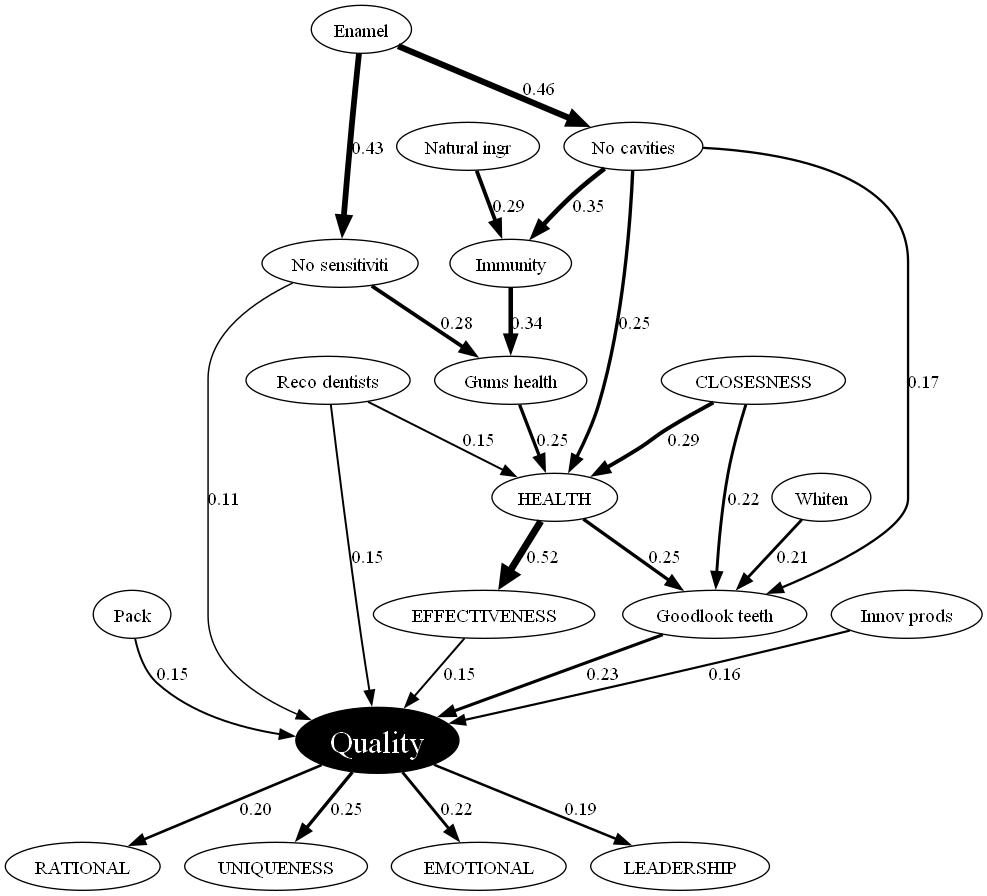

In [485]:
PlotGraph(gm.SubgraphFromNodes(['Quality']))

In [487]:
#d = gm.RoutesLenFromAllNodes(['EMOTIONAL', 'RATIONAL', 'LEADERSHIP', 'UNIQUENESS'])

d = gm.PathLenFromAllNodes(['LEADERSHIP', 'UNIQUENESS'])
#pd.DataFrame(pd.Series(d).sort_values(ascending=False)) #.to_csv('t.csv')
pd.Series(d).sort_values(ascending=False)

Quality           0.439584
Liked family      0.318341
Likeable flav     0.318201
Innov prods       0.317133
Goodlook teeth    0.275671
Reco dentists     0.254982
HEALTH            0.247542
Pack              0.216092
CLOSESNESS        0.132872
No cavities       0.117689
Modern            0.113122
Enamel            0.082539
Lots innovs       0.067777
EFFECTIVENESS     0.065273
No sensitiviti    0.064916
Gums health       0.061033
Whiten            0.058497
Immunity          0.020872
Natural ingr      0.006007
RATIONAL          0.000000
For daily use     0.000000
UNIQUENESS        0.000000
FRESH_BREATH      0.000000
EMOTIONAL         0.000000
LEADERSHIP        0.000000
dtype: float64

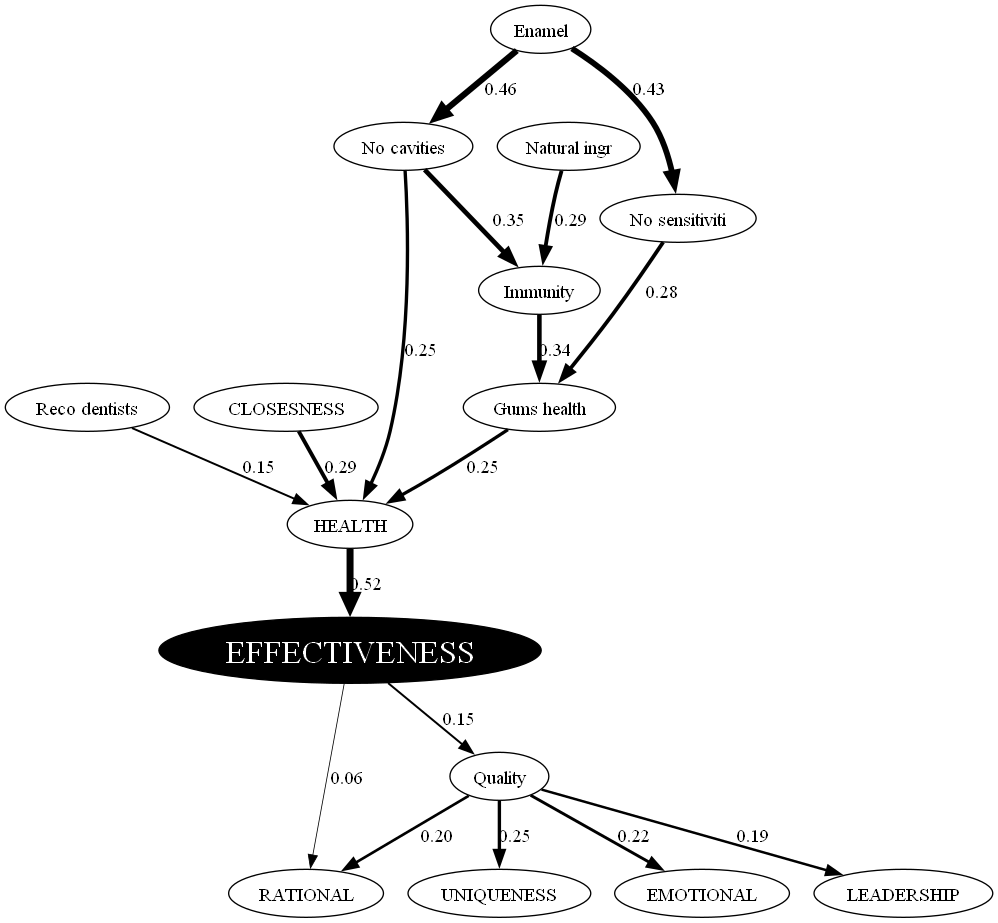

In [488]:
PlotGraph(gm.SubgraphFromNodes(['EFFECTIVENESS']))

In [489]:
gm.PathLen('EFFECTIVENESS', ['RATIONAL', 'UNIQUENESS'])

0.1272158980610587

In [490]:
gm.PathLenFromAllNodes(['RATIONAL', 'UNIQUENESS'])

Pack              0.227169
Likeable flav     0.384309
Lots innovs       0.000000
Quality           0.451240
Whiten            0.062184
Goodlook teeth    0.293046
FRESH_BREATH      0.000000
EMOTIONAL         0.000000
CLOSESNESS        0.184589
For daily use     0.000000
HEALTH            0.411121
Reco dentists     0.216582
LEADERSHIP        0.000000
UNIQUENESS        0.000000
Innov prods       0.151433
Modern            0.000000
Natural ingr      0.009976
Immunity          0.034664
EFFECTIVENESS     0.127216
RATIONAL          0.000000
No sensitiviti    0.077599
Enamel            0.110792
No cavities       0.166941
Gums health       0.101365
Liked family      0.450925
dtype: float64

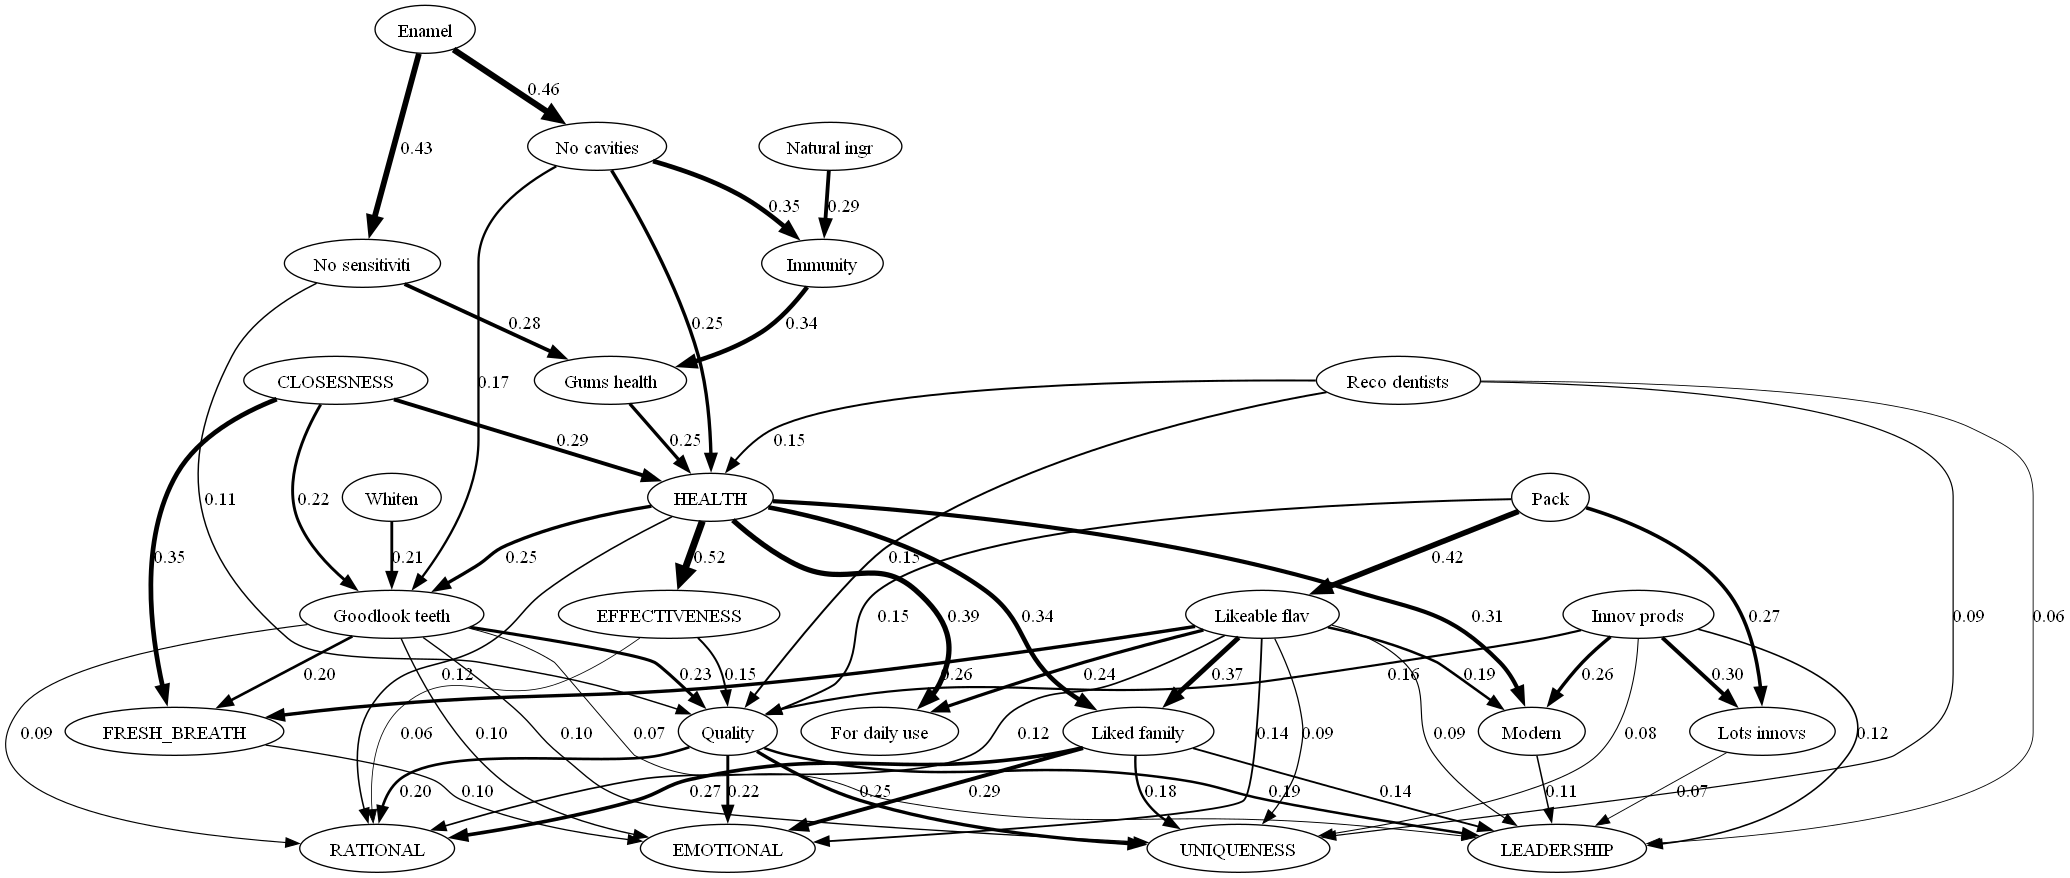

In [495]:
PlotGraph(gm.Graph(add_pls_weights=True))

In [497]:
G = gm.Graph(add_pls_weights=True)

Warning! PLS is not fit, building without PLS weights


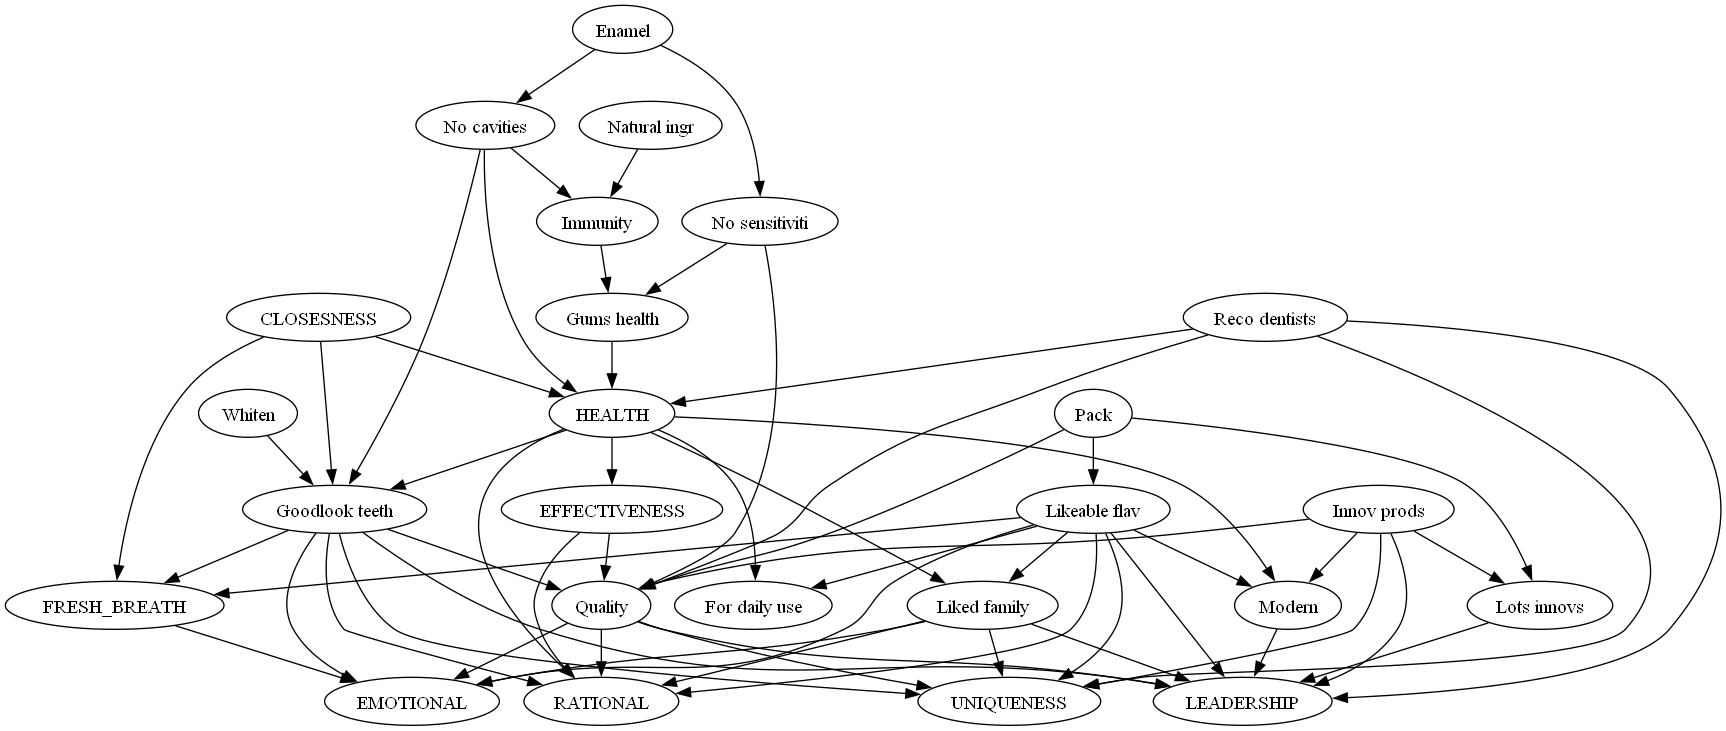

In [512]:
gm1 = GraphicModel(G)
PlotGraph(gm1.Graph())

In [513]:
gm1.AppendMDFGraph()

In [517]:
gm.AppendMDFGraph()
gm.FitPLSPM(data)

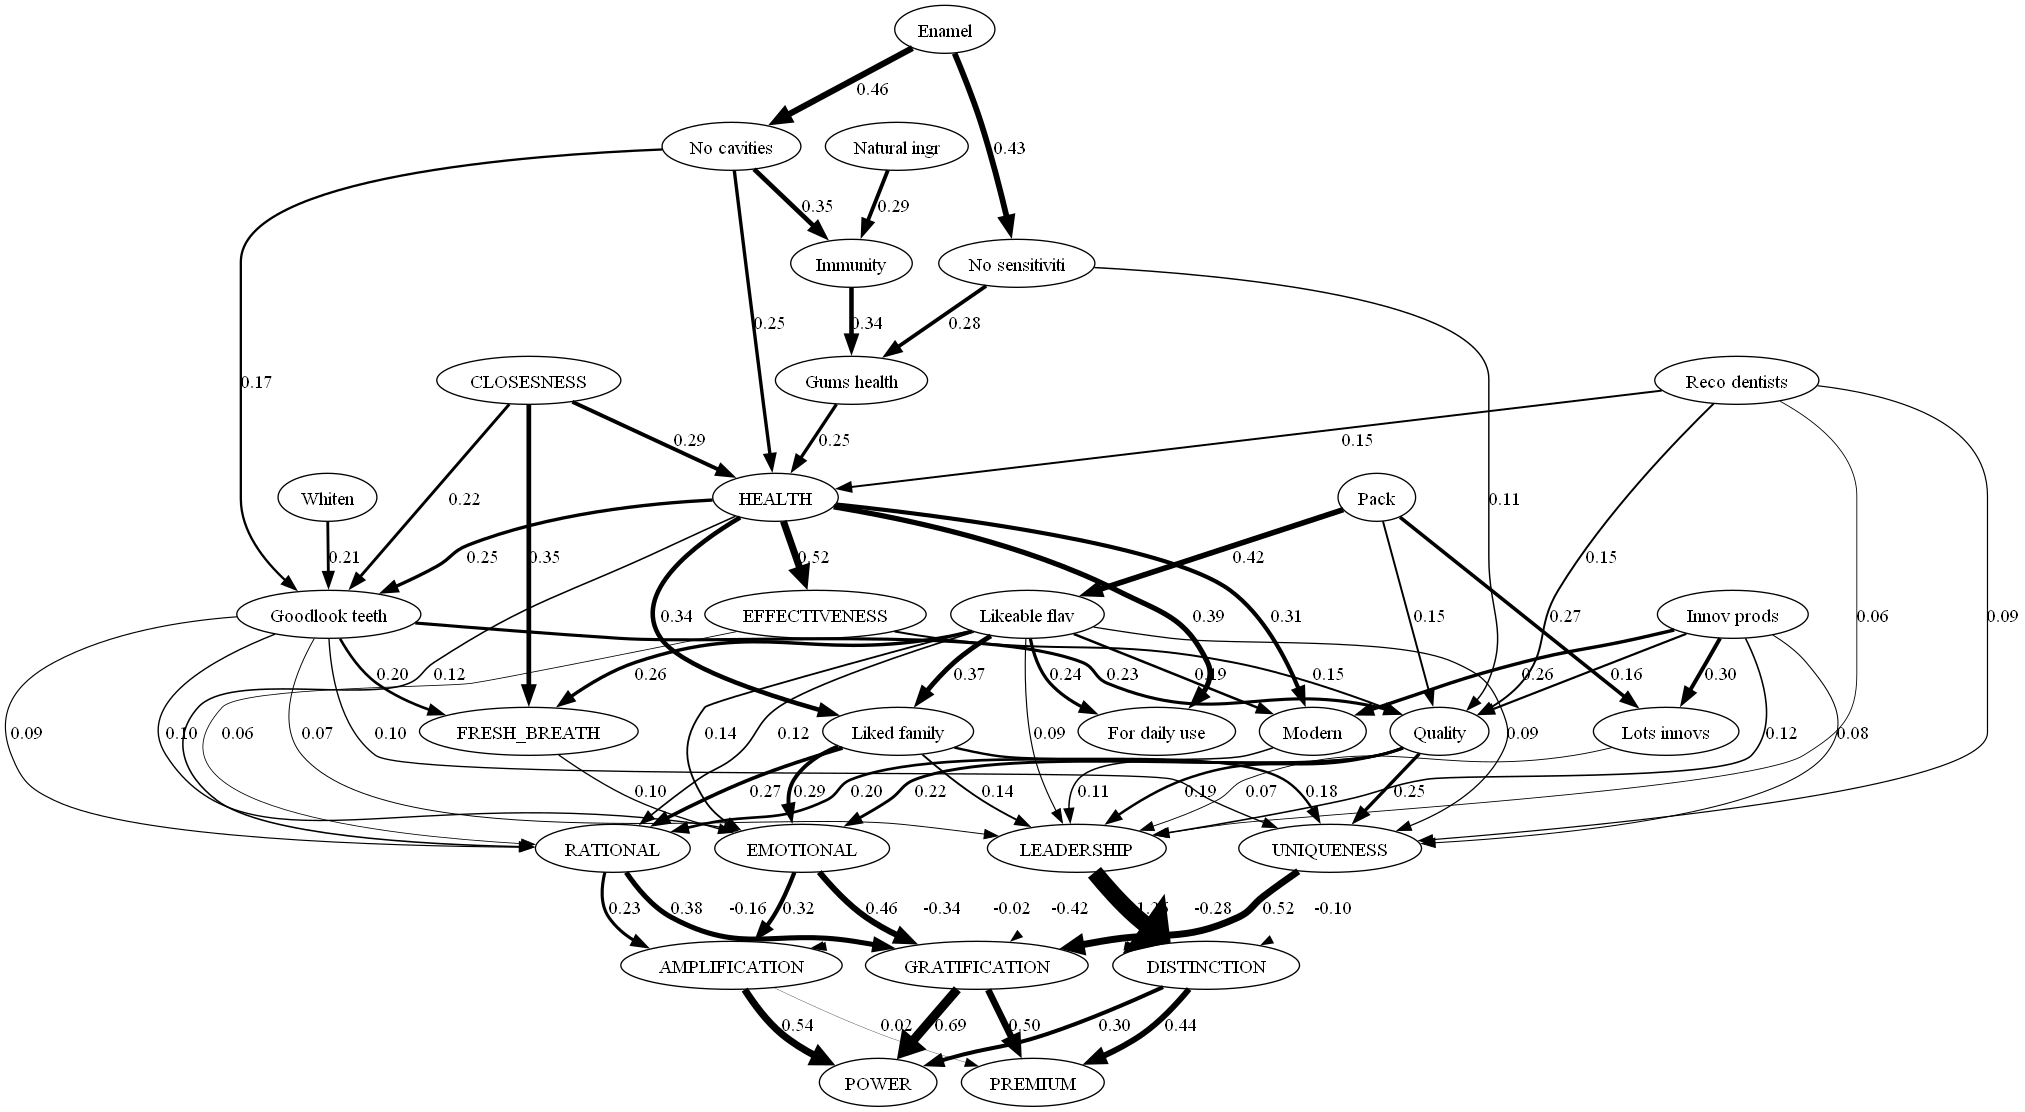

In [527]:
PlotGraph(gm.Graph(exclude_mdf=False))

In [521]:
gm.PathLenFromAllNodes('POWER')

GRATIFICATION     0.688587
AMPLIFICATION     0.536138
EMOTIONAL         0.383532
RATIONAL          0.339975
DISTINCTION       0.301477
Liked family      0.247494
Likeable flav     0.220324
Quality           0.211178
HEALTH            0.191728
UNIQUENESS        0.177477
Goodlook teeth    0.149453
Pack              0.124639
CLOSESNESS        0.102209
No cavities       0.080067
Reco dentists     0.080041
LEADERSHIP        0.077349
Innov prods       0.061200
Enamel            0.052725
EFFECTIVENESS     0.051828
Gums health       0.047272
FRESH_BREATH      0.037563
No sensitiviti    0.036269
Whiten            0.031714
Immunity          0.016166
Modern            0.008750
Lots innovs       0.005242
Natural ingr      0.004652
For daily use     0.000000
POWER             0.000000
PREMIUM           0.000000
dtype: float64

In [534]:
gm.model_spec.ToDF()

,from,to,type
0,Pack,Likeable flav,path
1,Pack,Lots innovs,path
2,Pack,Quality,path
3,Whiten,Goodlook teeth,path
4,FRESH_BREATH,EMOTIONAL,path
...,...,...,...
74,DISTINCTION,POWER,mdf
75,AMPLIFICATION,POWER,mdf
76,GRATIFICATION,PREMIUM,mdf
77,DISTINCTION,PREMIUM,mdf


## Test BSA functions

In [61]:
bsa = ExploratoryAnalysis()
bsa.BSAReports('data/data.xlsx')

Read File - Ok
Read model spec - Ok
